2.1 파이토치 개요

In [1]:
import torch
torch.tensor([[1.,-1.], [1.,-1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

2.2 파이토치 기초 문법

In [2]:
import torch
print(torch.tensor([[1,2],[3,4]]))
print(torch.tensor([[1,2],[3,4]], device="cpu"))
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [3]:
temp=torch.tensor([[1,2],[3,4]])
print(temp.numpy())

temp=torch.tensor([[1,2],[3,4]], device="cpu")
print(temp.to('cpu').numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [4]:
temp=torch.FloatTensor([1,2,3,4,5,6,7])
print(temp[0], temp[1], temp[-1])
print('------------------------')
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [5]:
v=torch.tensor([1,2,3])
w=torch.tensor([3,4,6])
print(w-v)

tensor([2, 2, 3])


In [6]:
temp=torch.tensor([
    [1,2],[3,4]])

print(temp.shape)
print('---------------------')
print(temp.view(4,1))
print('---------------------')
print(temp.view(-1))
print('---------------------')
print(temp.view(1,-1))
print('---------------------')
print(temp.view(-1,1))

torch.Size([2, 2])
---------------------
tensor([[1],
        [2],
        [3],
        [4]])
---------------------
tensor([1, 2, 3, 4])
---------------------
tensor([[1, 2, 3, 4]])
---------------------
tensor([[1],
        [2],
        [3],
        [4]])


In [7]:
pip install requests

In [8]:
import torchvision.transforms as transforms

mnist_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
])


from torchvision.datasets import MNIST
import requests

download_root='../chap02/data/MNIST_DATASET'

train_dataset=MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset=MNIST(download_root, transform = mnist_transform, train=False, download=True)
test_dataset=MNIST(download_root, transform = mnist_transform, train=False, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.7MB/s]


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.67MB/s]


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.08MB/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



In [9]:
import torch.nn as nn
model=nn.Linear(in_features=1, out_features=1, bias=True)

In [10]:
class MLP(nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer=Linear(inputs, 1)
        self.activation=Sigmoid()

    def forward(self, X):
        X=self.layer(X)
        X=self.activation(X)
        return X

In [11]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer2=nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer3=nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True))

    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=x.view(x.shape[0],-1)
        x=self.layer3(x)
        return x
model=MLP()

print("Printing children\n-----------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n-------------------------")
print(list(model.modules()))

Printing children
-----------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
-------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_feature

In [12]:
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden=nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation=nn.ReLU()
    output=nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net=nn.Sequential(hidden, activation, output)
    return net

In [13]:
#모델 파라미터 정의 예시 코드
'''
from torch.optim import optimizer
from torch.utils.data import DataLoader
criterion=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler=torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.95**epoch)

for epoch in range(1, 100+1):
    for x, y in dataloader:
        optimizer.zero_grad()
loss_fn(model(x), y).backward()
optimizer.step()
scheduler.step()
'''

'\nfrom torch.optim import optimizer\nfrom torch.utils.data import DataLoader\ncriterion=torch.nn.MSELoss()\noptimizer=torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)\nscheduler=torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,\n                                            lr_lambda=lambda epoch: 0.95**epoch)\n\nfor epoch in range(1, 100+1):\n    for x, y in dataloader:\n        optimizer.zero_grad()\nloss_fn(model(x), y).backward()\noptimizer.step()\nscheduler.step()\n'

In [14]:
#모델 훈련 예시 코드
'''
for epoch in range(100):
    yhat=model(x_train)
    loss=criterion(yhat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
'''

'\nfor epoch in range(100):\n    yhat=model(x_train)\n    loss=criterion(yhat, y_train)\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n'

In [15]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [16]:
#함수를 이용하여 모델 평가
'''
import torch
import torchmetrics

preds=torch.randn(10,5).softmax(dim=-1)
target=torch.randint(5, (10,))

acc=torchmetrics.functional.accuracy(preds, target)
'''

'\nimport torch\nimport torchmetrics\n\npreds=torch.randn(10,5).softmax(dim=-1)\ntarget=torch.randint(5, (10,))\n\nacc=torchmetrics.functional.accuracy(preds, target)\n'

In [17]:
#모듈을 이용하여 모델 평가
'''
import torch
import torchmetrics
metric=torchmetrics.Accuracy()

n_batches=10

for i in range(n_batches):
  preds=torch.randn(10,5).softmax(dim = -1)
  target=torch.randint(5, (10,))

  acc=metric(preds, target)
  print(f"Accuracy on batch {i}: {acc}")

acc=metric.compute()
print(f"Accuracy on all data: {acc}")
'''

'\nimport torch\nimport torchmetrics\nmetric=torchmetrics.Accuracy()\n\nn_batches=10\n\nfor i in range(n_batches):\n  preds=torch.randn(10,5).softmax(dim = -1)\n  target=torch.randint(5, (10,))\n\n  acc=metric(preds, target)\n  print(f"Accuracy on batch {i}: {acc}")\n\nacc=metric.compute()\nprint(f"Accuracy on all data: {acc}")\n'

In [18]:
pip install tensorboard

In [19]:
#텐서보드를 위한 코드
'''
import torch
from torch.utils.tensorboard import SummaryWriter

writer=SummaryWriter('../chap02/tensorboard')

for epoch in range(num_epochs):
    model.train()
    batch_loss=0.0

for i, (x,y) in enumerate(dataloader):
    x, y=x.to(device).float(), y.to(device).float()
    outputs=model(x)
    loss=criterion(outputs, y)
    writer.add_scalar('Loss', loss, epoch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

writer.close()
'''

"\nimport torch\nfrom torch.utils.tensorboard import SummaryWriter\n\nwriter=SummaryWriter('../chap02/tensorboard')\n\nfor epoch in range(num_epochs):\n    model.train()\n    batch_loss=0.0\n\nfor i, (x,y) in enumerate(dataloader):\n    x, y=x.to(device).float(), y.to(device).float()\n    outputs=model(x)\n    loss=criterion(outputs, y)\n    writer.add_scalar('Loss', loss, epoch)\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\nwriter.close()\n"

2.4 파이토치 코드 맛보기

In [20]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
dataset=pd.read_csv('car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

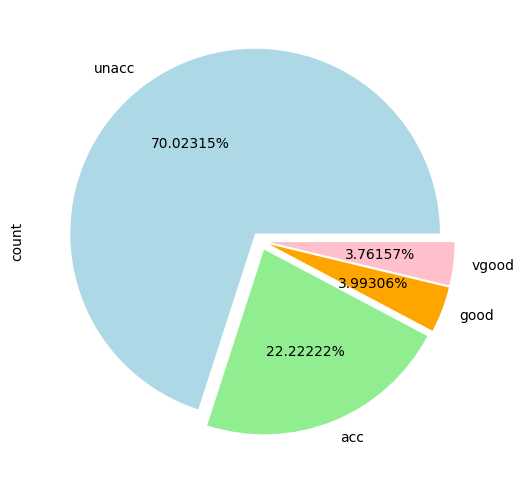

In [23]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=8
fig_size[1]=6
plt.rcParams["figure.figsize"]=fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                   explode = (0.05,0.05,0.05,0.05))

In [24]:
categorical_columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category]=dataset[category].astype('category')

price=dataset['price'].cat.codes.values
maint=dataset['maint'].cat.codes.values
doors=dataset['doors'].cat.codes.values
persons=dataset['persons'].cat.codes.values
lug_capacity=dataset['lug_capacity'].cat.codes.values
safety=dataset['safety'].cat.codes.values

categorical_data=np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [25]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.array([[5,6],[7,8],[9,10]])

print(np.concatenate((a,b), axis=0))
print(np.stack((a,b), axis=0))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [26]:
print(np.concatenate((a,c), axis=0))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [27]:
print(np.stack((a,c), axis=0))

ValueError: all input arrays must have the same shape

In [28]:
categorical_data=torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [29]:
outputs=pd.get_dummies(dataset.output)
outputs=outputs.values
outputs=torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [30]:
import pandas as pd
import numpy as np

data={
    'gender':['male','female','male'],
    'weight':[72,55,68],
    'nation':['Japan','Korea','Australia']
}

df=pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [31]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


In [32]:
categorical_column_sizes=[len(dataset[column].cat.categories) for column in
                          categorical_columns]
categorical_embedding_sizes=[(col_size, min(50, (col_size+1)//2)) for col_size in
                             categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [33]:
total_records=1728
test_records=int(total_records*.2)

categorical_train_data=categorical_data[:total_records-test_records]
categorical_test_data=categorical_data[total_records-test_records : total_records]
train_outputs=outputs[:total_records-test_records]
test_outputs=outputs[total_records-test_records : total_records]

In [34]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [35]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings=nn.ModuleList([nn.Embedding(ni,nf) for ni,
                                           nf in embedding_size])

        self.embedding_dropout=nn.Dropout(p)

        all_layers=[]
        num_categorical_cols=sum((nf for ni, nf in embedding_size))
        input_size=num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size=i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers=nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings=[]
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x=torch.cat(embeddings, 1)
        x=self.embedding_dropout(x)
        x=self.layers(x)
        return x

In [36]:
model=Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [37]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
if torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device=torch.device('cpu')

In [39]:
epochs=500
aggregated_losses=[]
train_outputs=train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs):
    i+=1
    y_pred=model(categorical_train_data).to(device)
    single_loss=loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25==1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.59019578
epoch:  26 loss: 1.37818158
epoch:  51 loss: 1.29350221
epoch:  76 loss: 1.18616498
epoch: 101 loss: 1.05419004
epoch: 126 loss: 0.92576605
epoch: 151 loss: 0.84381044
epoch: 176 loss: 0.74752682
epoch: 201 loss: 0.69849592
epoch: 226 loss: 0.66549182
epoch: 251 loss: 0.62903601
epoch: 276 loss: 0.62212306
epoch: 301 loss: 0.60995245
epoch: 326 loss: 0.58869094
epoch: 351 loss: 0.59049982
epoch: 376 loss: 0.58845687
epoch: 401 loss: 0.58981967
epoch: 426 loss: 0.57581121
epoch: 451 loss: 0.58085591
epoch: 476 loss: 0.56942970
epoch: 500 loss: 0.5763439536


In [40]:
test_outputs=test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val=model(categorical_test_data)
    loss=loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.56247926


In [41]:
print(y_val[:5])

tensor([[ 2.9422,  1.5064, -3.5631, -3.6276],
        [ 2.9516,  1.7644, -3.8198, -4.4010],
        [ 2.5242,  1.2867, -2.6827, -2.8742],
        [ 2.8437,  1.7392, -3.5499, -3.5366],
        [ 2.2032,  1.1686, -2.9652, -2.9766]])


In [42]:
y_val=np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[257   2]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       259
           1       0.33      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.54      0.50      0.44       345
weighted avg       0.65      0.75      0.65       345

0.7478260869565218
